I will try two methods to predict when a safety car may be deployed and called in during a race to assist with strategy planning. 

Data from previous grand prix (Since 2018 - new regulations) at the circuit will be used to train the model. The model will then be evaluated against 2021's race in order to observe capabilities.

The first method will be solely based on when safety cars were deployed during the race. From the fast-F1 package there is a track status column, which contains numerical codes that are associated with different situations that may come up during a race. Based on the laps that were classified as safety car periods, I've attempted to build a plot the kernel probability density curves for when each event is probable to occur. 

The second method is more granular, and takes more effort in the data organization and planning stage. This model is reliant on traffic, specifically traffic within a sector. Using the session start time, the time a car is in each sector of each lap is recorded. Based on this accumulated time, the number of cars within an arbitrary time window is noted. The model will be trained using this interpolated data, in addition to the column that denote the track status on that lap. 

In [2]:
import fastf1 as ff1
import pandas as pd
from fastf1 import plotting
from matplotlib import pyplot as plt

In [9]:
# use fast-f1 to get bahrain race sessions since 2018
bahrain_21 = ff1.get_session(2018, 'Bahrain', 'R')
bahrain_21 = bahrain_21.load_laps()
bahrain_21 = pd.DataFrame(data = bahrain_21)
bahrain_21.to_csv('bahrain_18_race.csv')

# dataframes merged using sqlite


core           INFO 	Loading Bahrain Grand Prix - Race
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
core           INFO 	Loaded data for 20 drivers: ['5', '7', '77', '3', '10', '20', '27', '31', '44', '55', '28', '11', '14', '2', '33', '8', '9', '35', '16', '18']


In [12]:
# load csv
race = pd.read_csv('bahrain_track_status_history.csv')
race.head()
# create dataframes with each output variable (yellow flag, safety car deployed)
yellow_flag = race[["LapNumber","yellow_flag"]]
safety_car = race[["LapNumber","safety_car"]]
vsc = race[["LapNumber","vsc_deployed"]]

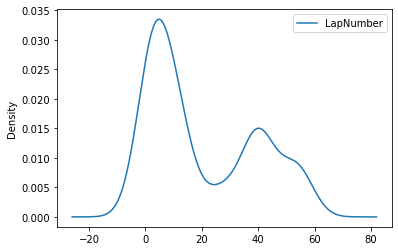

In [22]:
# create probability density curves for laps with 'yes' in each category

# yellow flag
yellow_flag = yellow_flag[yellow_flag["yellow_flag"] == "yes"]

yf = yellow_flag.plot.kde()

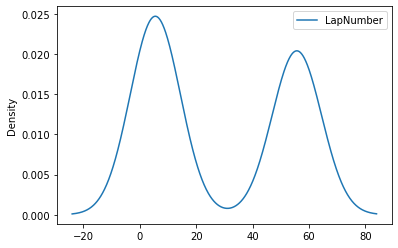

In [23]:
# safety car
safety_car = safety_car[safety_car["safety_car"] == "yes"]

sc = safety_car.plot.kde()

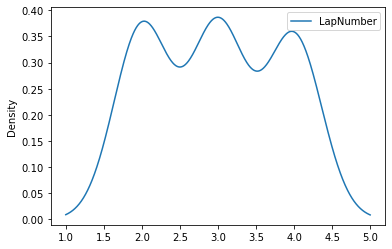

In [24]:
# yellow flag
vsc = vsc[vsc["vsc_deployed"] == "yes"]

vscp = vsc.plot.kde()

In [26]:
vsc.describe()

,LapNumber
count,56.000000
mean,2.982143
std,0.820002
min,2.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,4.000000


In [29]:
race2 = pd.read_csv('bahrain_track_status_21.csv')
race2.head()

,LapNumber,clear_track,yellow_flag,safety_car,vsc_deployed,vsc_ending
0,1.0,no,yes,yes,no,no
1,2.0,no,no,yes,no,no
2,3.0,no,no,yes,no,no
3,4.0,no,yes,no,yes,no
4,5.0,no,no,no,yes,yes


In [30]:
yellow_flag_21 = race2[["LapNumber","yellow_flag"]]
safety_car_21 = race2[["LapNumber","safety_car"]]
vsc_21 = race2[["LapNumber","vsc_deployed"]]

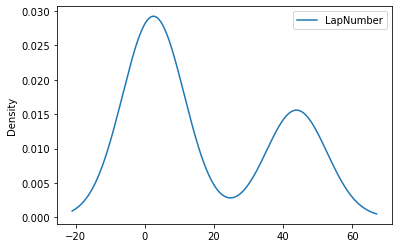

In [31]:
# yellow flag
yellow_flag_21 = yellow_flag_21[yellow_flag_21["yellow_flag"] == "yes"]

yf21 = yellow_flag_21.plot.kde()

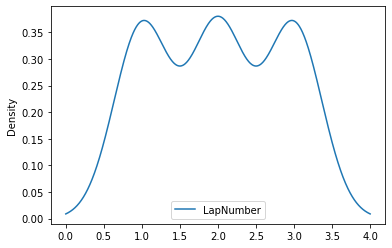

In [33]:
# safety car
safety_car_21 = safety_car_21[safety_car_21["safety_car"] == "yes"]

sc21 = safety_car_21.plot.kde()

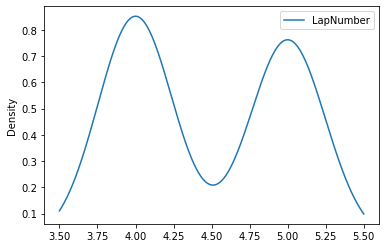

In [34]:
# yellow flag
vsc_21 = vsc_21[vsc_21["vsc_deployed"] == "yes"]

vscp_21 = vsc_21.plot.kde()

In [ ]:
https://stackoverflow.com/questions/15800895/finding-clusters-of-numbers-in-a-list
    
- how to access list in dictionary
- https://stackoverflow.com/questions/53017026/how-can-i-access-list-values-in-a-dictionary

